In [41]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad

In [16]:
a1 = np.array([1, 2, 1])
a2 = np.array([1, 3])

np.convolve(a1, a2)

array([1, 5, 7, 3])

# Discrete Convolutions

For a discrete 1D function:

$$
f[x] = [f_0, f_1, \dots, f_{N-1}] \\
g[x] = [g_0, g_1, \dots, g_{M-1}]
$$

The convolution of $ f $ and $ g $, denoted by $ (f * g)[n] $, is defined as:

$$
(f * g)[n] = \sum_{k=0}^{N-1} f[k] \cdot g[n - k]
$$


More precisely, for sequences of lengths $ N $ and $ M $, the convolution is given by:

$$
(f * g)[n] = \sum_{k=0}^{N-1} f[k] \cdot g[n - k], \quad \text{for } n = 0, 1, \dots, n + m - 2
$$

If an index is out of bounds for $ g $, the corresponding term is treated as zero (zero-padding).

This results in a new sequence of length $ N + M - 1 $.

In [19]:
""" The convolution of 1D discrete functions f and g passed as np.array"""
def convolve(f: np.array, g: np.array) -> np.array:
    result = np.zeros(len(f) + len(g) - 1)
    for n in range(len(result)):
        for k in range(len(f)):
            if 0 <= n - k < len(g):
                result[n] += f[k] * g[n -k]
    return result

In [20]:
convolve(a1, a2)

array([1., 5., 7., 3.])

# Continuous 1D Convolutions

For continuous functions $ f(t) $ and $ g(t) $, the **convolution** of $ f $ and $ g $, denoted by $ (f * g)(t) $, is defined as:

$$
(f * g)(t) = \int_{-\infty}^{\infty} f(x) \cdot g(t - x) \, dx
$$

Alternatively, it can be written with variables switched:

$$
(f * g)(t) = \int_{-\infty}^{\infty} f(t - x) \cdot g(x) \, dx
$$

The result $ (f * g)(t) $ expresses how much $ g $ overlaps with a **time-shifted** version of $ f $, and is used extensively probability and statistics.


In [93]:
def f(x):
    return np.exp(-x**2)

def g(x):
    return np.exp(-x**2)

def g_tmx(t, x):
    return g(t - x)

In [94]:
x = np.linspace(-5, 5, 1000)
t = 2

f_y = f(x)
g_y = g(x)
g_tmx_y = g_tmx(t, x)

In [95]:
def f_conv_g(t):
    integrand = lambda x: f(x) * g_tmx(t, x)
    result, _ = quad(integrand, -np.inf, np.inf)
    return result

t = x
f_conv_g_y = np.array([f_conv_g(t_) for t_ in t])

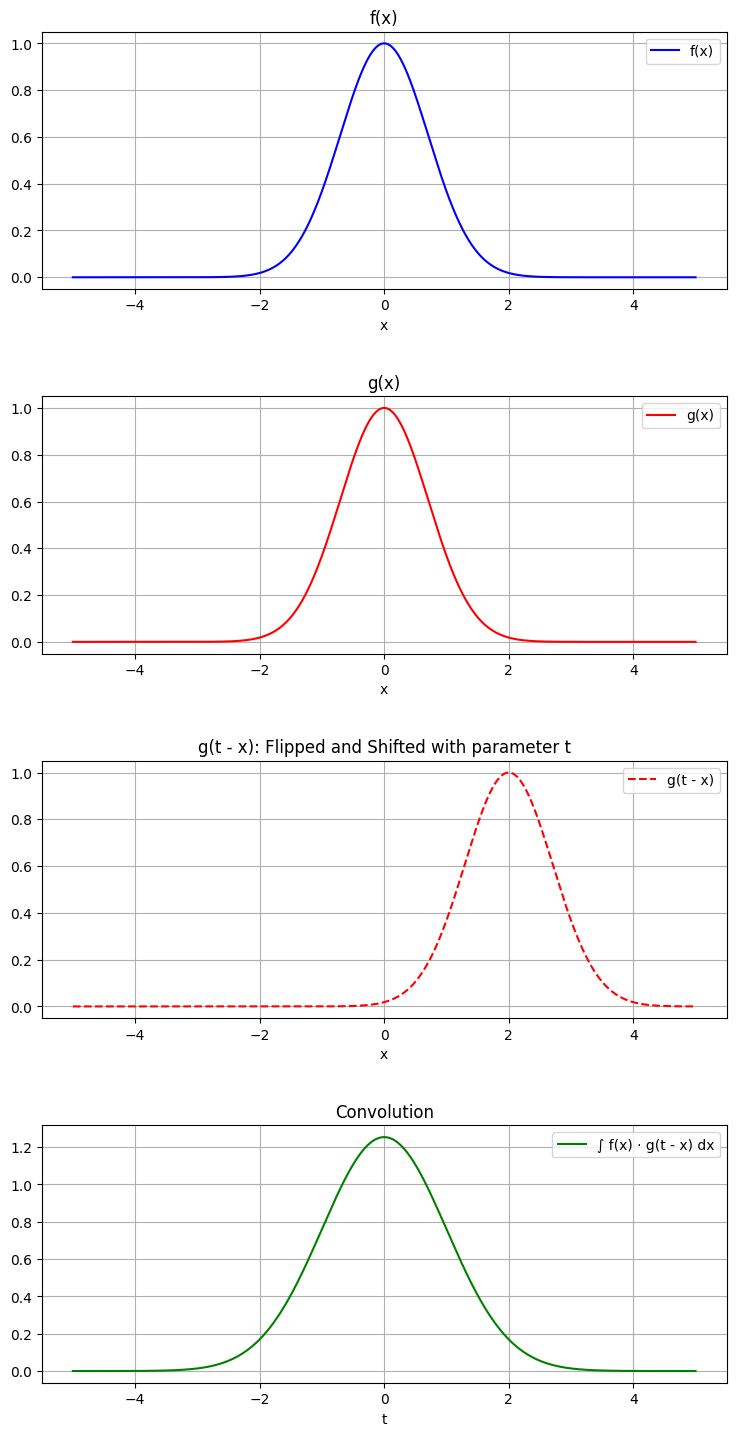

In [97]:
fig, axs = plt.subplots(4, 1, figsize=(8, 15), sharex=False)

axs[0].plot(x, f_y, label='f(x)', color='blue')
axs[0].set_title('f(x)')
axs[0].set_xlabel('x')  
axs[0].grid(True)
axs[0].legend()

axs[1].plot(x, g_y, label='g(x)', color='red')
axs[1].set_title('g(x)')
axs[1].set_xlabel('x')  
axs[1].grid(True)
axs[1].legend()

axs[2].plot(x, g_tmx_y, label='g(t - x)', linestyle='--', color='red')
axs[2].set_title('g(t - x): Flipped and Shifted with parameter t')
axs[2].set_xlabel('x')  
axs[2].grid(True)
axs[2].legend()

axs[3].plot(t, f_conv_g_y, label='∫ f(x) · g(t - x) dx', color='green')
axs[3].set_title('Convolution')
axs[3].set_xlabel('t')  
axs[3].grid(True)
axs[3].legend()

# Add spacing to make all labels visible
plt.tight_layout(pad=3.0)
plt.show()